<a href="https://www.kaggle.com/code/matinmahmoudi/drug-prescription-classification?scriptVersionId=174879967" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Drug Prescription Classification Project

Welcome to the Drug Prescription Classification Project! This project is designed to be accessible for beginners in data science, providing a step-by-step guide through the process of building and evaluating machine learning models. Our goal is to predict the type of drug prescribed to patients based on their health data. The dataset features include Age, Sex, Blood Pressure (BP), Cholesterol levels, Sodium (Na), and Potassium (K) levels, with the 'Drug' type as our target variable. We will explore and apply the following classification algorithms:

- K-Nearest Neighbors (KNN)
- Logistic Regression
- Decision Trees
- Support Vector Machines (SVM)

## Project Overview

This project is structured as follows:

1. **Data Exploration**: We will delve into our dataset, visualizing and understanding the distribution of features and the target variable, checking for missing values, and exploring the relationships between different features.

2. **Data Preprocessing**: The data will be prepared for modeling through steps such as encoding categorical variables, scaling numerical features, and splitting into training and test datasets.

3. **Model Building**: We will construct and train four distinct models using the aforementioned algorithms, each assessed on the training and test data.

4. **Model Evaluation**: The performance of each model will be evaluated using suitable metrics, with a comparative analysis to discuss their relative strengths and weaknesses.

5. **Conclusion**: We will wrap up with a summary of our insights and recommendations for further learning or investigation.

# 1. Data Exploration

In this initial step, our focus will be to explore the dataset thoroughly to gain insights into the various features, their distribution, and their relationship with the target variable ('Drug'). We aim to understand the data better to inform our subsequent preprocessing and modeling steps. Our data exploration will include the following tasks:

1. **Summary Statistics**: We'll start by examining the summary statistics of our dataset to understand the central tendencies and dispersion of numerical features and observe the distribution of categorical features.

2. **Missing Values Check**: It's crucial to identify any missing values within our dataset, as they can significantly impact the performance of our machine learning models.

3. **Data Distribution Visualization**: We'll visualize the distribution of various features to understand their characteristics and identify any patterns or anomalies. This includes histograms for numerical features and bar plots for categorical features.

4. **Correlation Analysis**: Understanding the relationships between numerical features can provide insights into the dataset structure. We'll use correlation matrices to identify potential relationships.

5. **Feature vs. Target Analysis**: Lastly, we'll explore the relationship between each feature and the target variable ('Drug') to identify potential influences and trends.

By the end of this step, we should have a comprehensive understanding of our dataset, setting a solid foundation for the following preprocessing and modeling stages.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set()

# Load the dataset
data_path = '/kaggle/input/introds/Drug.csv'
data = pd.read_csv(data_path)

# Display the first few entries of the dataset
print(data.head())

   Age Sex      BP Cholesterol        Na         K   Drug
0   23   F    HIGH        HIGH  0.792535  0.031258  drugY
1   47   M     LOW        HIGH  0.739309  0.056468  drugC
2   47   M     LOW        HIGH  0.697269  0.068944  drugC
3   28   F  NORMAL        HIGH  0.563682  0.072289  drugX
4   61   F     LOW        HIGH  0.559294  0.030998  drugY


In [2]:
# 0. Display basic information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na           200 non-null    float64
 5   K            200 non-null    float64
 6   Drug         200 non-null    object 
dtypes: float64(2), int64(1), object(4)
memory usage: 11.1+ KB


In [3]:
# 1. Summary Statistics
data.describe()

,Age,Na,K
count,200.000000,200.000000,200.000000
mean,44.315000,0.697095,0.050174
std,16.544315,0.118907,0.017611
min,15.000000,0.500169,0.020022
25%,31.000000,0.583887,0.035054
50%,45.000000,0.721853,0.049663
75%,58.000000,0.801494,0.066000
max,74.000000,0.896056,0.079788


In [4]:
# 2. Missing Values Check
data.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na             0
K              0
Drug           0
dtype: int64

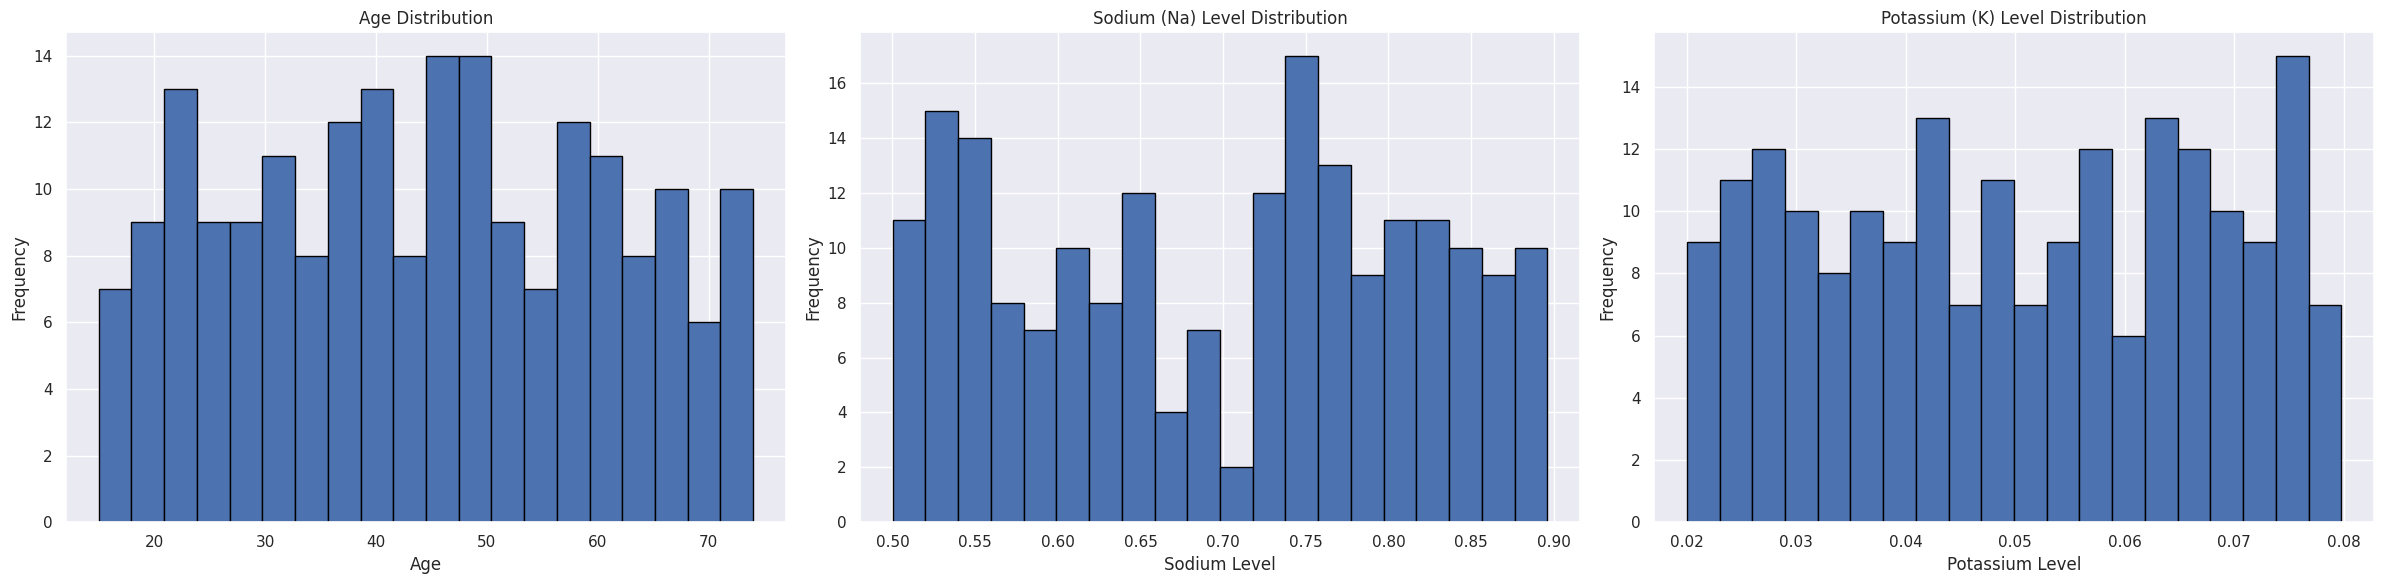

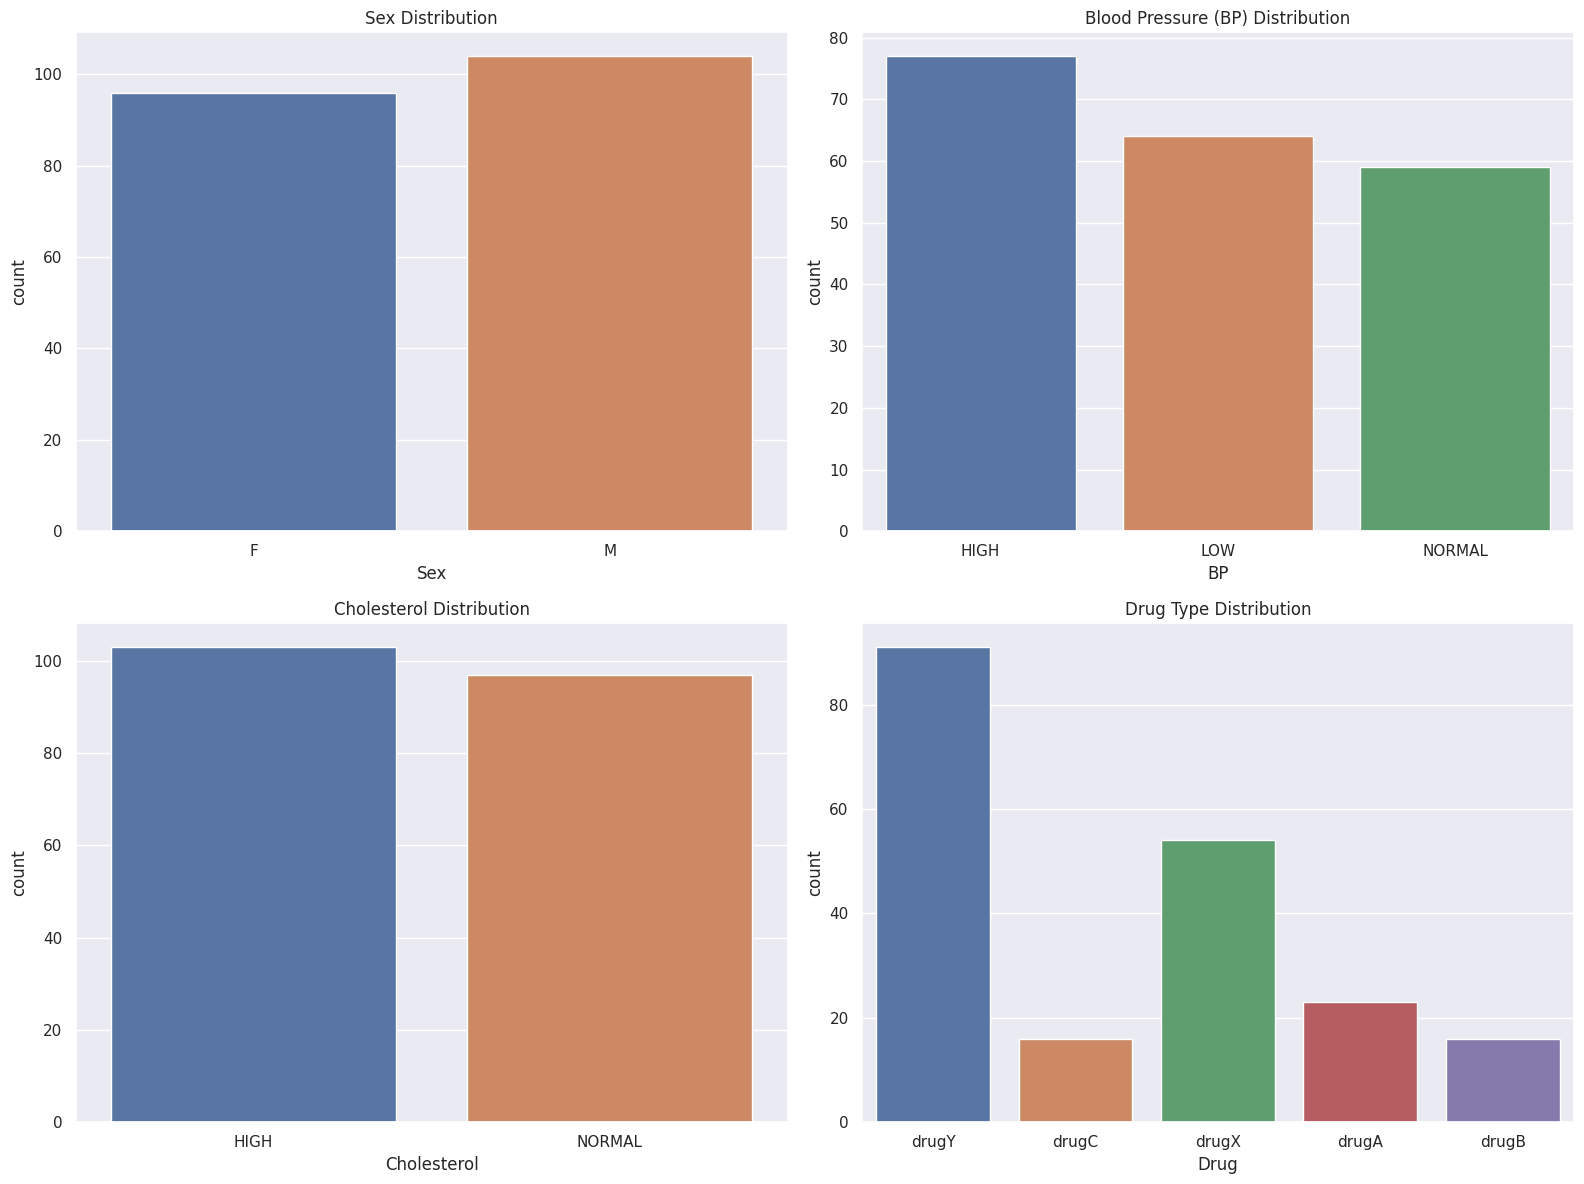

In [5]:
# Numerical Features Distribution
fig, ax = plt.subplots(1, 3, figsize=(24, 6))  # Adjust for 3 subplots
data['Age'].hist(ax=ax[0], bins=20, edgecolor='black')
ax[0].set_title('Age Distribution')
ax[0].set_xlabel('Age')
ax[0].set_ylabel('Frequency')

data['Na'].hist(ax=ax[1], bins=20, edgecolor='black')  # Plot for Sodium
ax[1].set_title('Sodium (Na) Level Distribution')
ax[1].set_xlabel('Sodium Level')
ax[1].set_ylabel('Frequency')

data['K'].hist(ax=ax[2], bins=20, edgecolor='black')  # Plot for Potassium
ax[2].set_title('Potassium (K) Level Distribution')
ax[2].set_xlabel('Potassium Level')
ax[2].set_ylabel('Frequency')

plt.tight_layout()


# Categorical Features Distribution
fig, ax = plt.subplots(2, 2, figsize=(16, 12))
sns.countplot(x='Sex', data=data, ax=ax[0, 0])
ax[0, 0].set_title('Sex Distribution')

sns.countplot(x='BP', data=data, ax=ax[0, 1])
ax[0, 1].set_title('Blood Pressure (BP) Distribution')

sns.countplot(x='Cholesterol', data=data, ax=ax[1, 0])
ax[1, 0].set_title('Cholesterol Distribution')

sns.countplot(x='Drug', data=data, ax=ax[1, 1])
ax[1, 1].set_title('Drug Type Distribution')

plt.tight_layout()


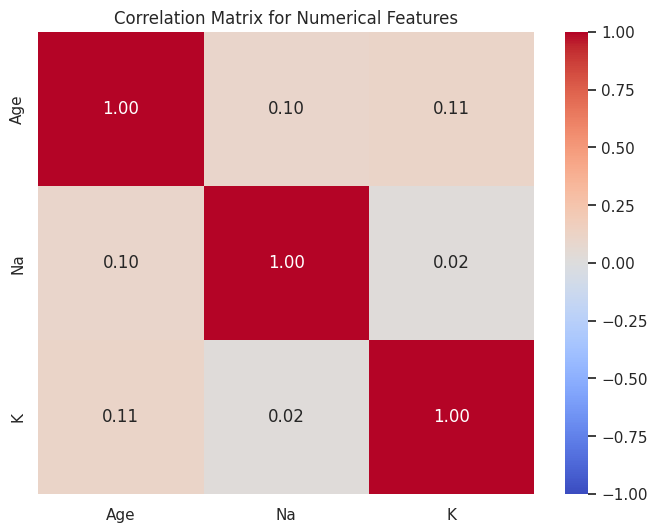

In [6]:
# 4. Correlation Analysis
# Calculating the correlation matrix for numerical features only
numerical_data = data[['Age', 'Na', 'K']]
correlation_matrix = numerical_data.corr()

# Creating a heatmap for the correlation matrix

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix for Numerical Features')
plt.show()

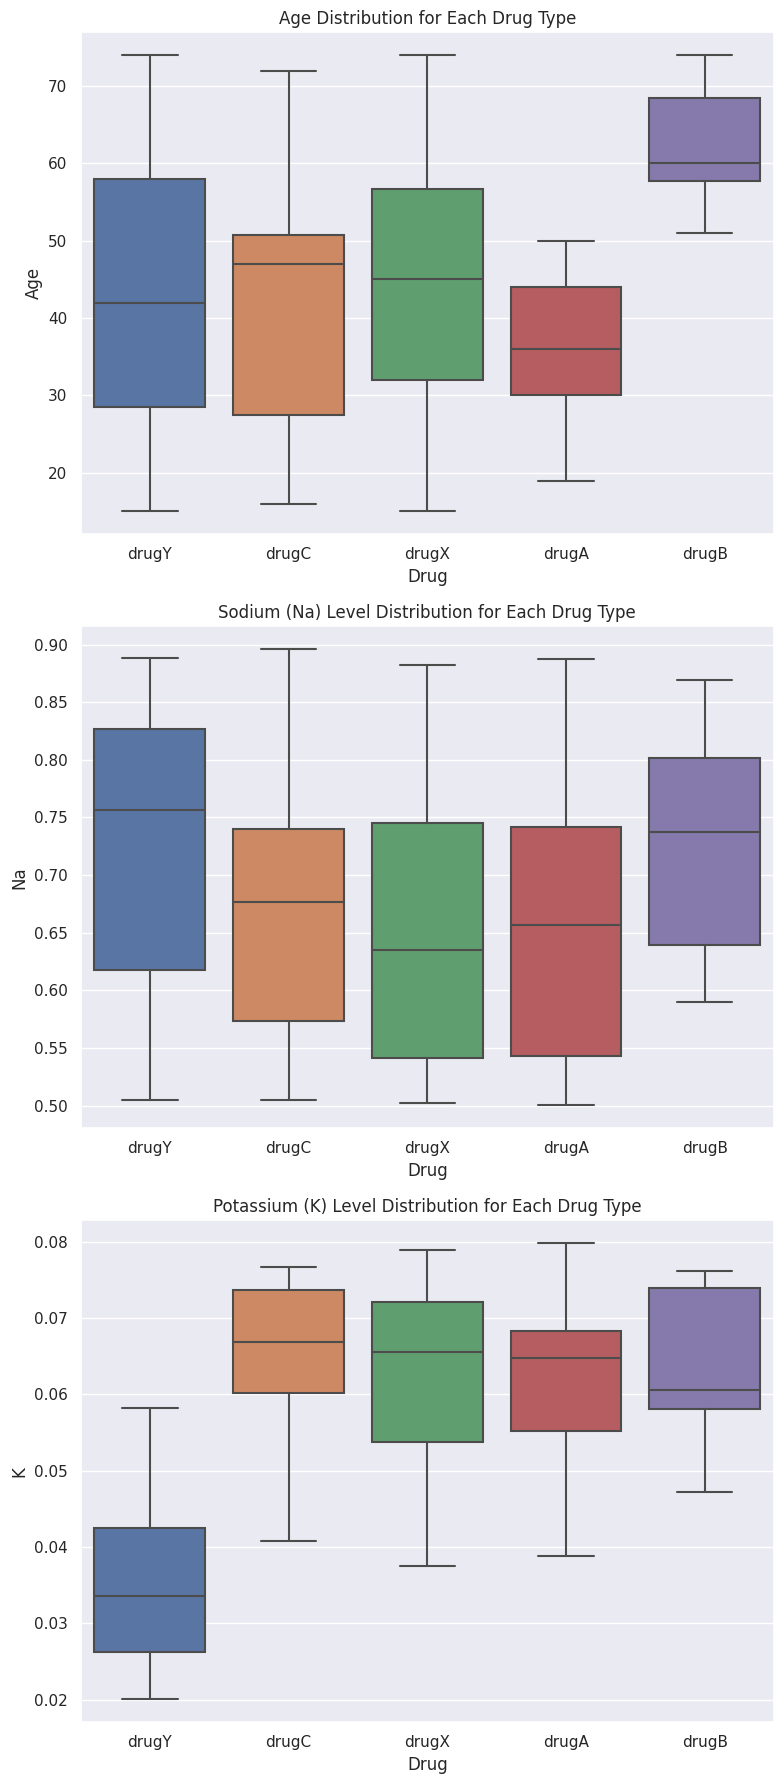

In [7]:
# 5. Feature vs. Target Analysis
fig, ax = plt.subplots(3, 1, figsize=(8, 18))

# Boxplot for Age vs Drug
sns.boxplot(x='Drug', y='Age', data=data, ax=ax[0])
ax[0].set_title('Age Distribution for Each Drug Type')

# Boxplot for Na vs Drug
sns.boxplot(x='Drug', y='Na', data=data, ax=ax[1])
ax[1].set_title('Sodium (Na) Level Distribution for Each Drug Type')

# Boxplot for K vs Drug
sns.boxplot(x='Drug', y='K', data=data, ax=ax[2])
ax[2].set_title('Potassium (K) Level Distribution for Each Drug Type')

plt.tight_layout()



# 2. Data Preprocessing

In this crucial step, we prepare our dataset for the modeling phase, ensuring that our data is in the appropriate format for the machine learning algorithms. The main tasks in data preprocessing include encoding categorical variables, scaling numerical features, and splitting the data into training and testing sets. Here's a breakdown of each task:

### Encoding Categorical Variables

Many machine learning models require numerical input, so categorical variables need to be converted into a numerical format. We use one-hot encoding to transform the categorical features ('Sex', 'BP', 'Cholesterol') into binary vectors, representing the presence or absence of each category with 0s and 1s.

### Splitting the Dataset

we divide our dataset into a training set and a testing set, allowing us to train our models on one subset of the data and evaluate their performance on an independent set. Typically, we allocate 80% of the data for training and 20% for testing. This split ensures that our model can generalize well to unseen data.

### Scaling Numerical Features

Finally, To ensure that each numerical feature contributes equally to the model's prediction, we scale the features ('Age', 'Na', 'K'). Standard scaling is applied to normalize the data, setting the mean to 0 and standard deviation to 1. This step helps improve the convergence of the model and its sensitivity to the feature values.


By the end of these preprocessing steps, our data is clean, formatted, and ready for the modeling stage.


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Defining the feature set and the target variable
X = data.drop('Drug', axis=1)
y = data['Drug']

# Identifying numerical and categorical features
numerical_features = ['Age', 'Na', 'K']
categorical_features = ['Sex', 'BP', 'Cholesterol']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Defining a column transformer with one-hot encoding for categorical features and scaling for numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Fitting the transformer on the training data and transforming both the training and test data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# 3. Model Building

In this phase, we will construct and train four distinct machine learning models using the algorithms we've selected: K-Nearest Neighbors (KNN), Logistic Regression, Decision Trees, and Support Vector Machines (SVM). Each model will be trained on our training dataset and then assessed based on its performance on the test dataset. The steps for model building are as follows:

### K-Nearest Neighbors (KNN)
KNN makes predictions for a new data point based on the majority label among its 'k' nearest neighbors in the feature space. It's a straightforward yet powerful algorithm, particularly effective for datasets where similar instances have similar labels.

### Logistic Regression
Logistic Regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although in more complex forms it can be used to model multiclass outcomes. It's widely used for binary classification tasks.

### Decision Trees
Decision Trees are flowchart-like structures that use branching methods to illustrate every possible outcome of a decision. They are easy to understand and interpret but can be prone to overfitting, especially with complex datasets.

### Support Vector Machines (SVM)
SVMs are a set of supervised learning methods used for classification, regression, and outliers detection. An SVM model is a representation of the examples as points in space, mapped so that the examples of the separate categories are divided by a clear gap that is as wide as possible.

After training each model, we will evaluate its performance on the test data to understand its effectiveness. The accuracy metric will help us in determining the best-performing model among the ones we have trained.


In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Initialize the models
knn = KNeighborsClassifier()
log_reg = LogisticRegression(max_iter=1000)  # Increased max_iter for convergence
decision_tree = DecisionTreeClassifier()
svm = SVC()

# Dictionary to store models and their respective accuracies
models = {
    'K-Nearest Neighbors': knn,
    'Logistic Regression': log_reg,
    'Decision Tree': decision_tree,
    'Support Vector Machine': svm
}

# Dictionary to store accuracies
accuracies = {}

# Train and evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train_processed, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test_processed)
    
    # Calculate the accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[model_name] = accuracy

accuracies

{'K-Nearest Neighbors': 0.875,
 'Logistic Regression': 0.975,
 'Decision Tree': 0.85,
 'Support Vector Machine': 0.9}

# 4. Model Evaluation

Once we have trained our models, the next crucial step is to evaluate their performance and understand their strengths and weaknesses. We primarily use accuracy to assess each model's effectiveness, but other metrics like precision, recall, and F1-score provide additional insights, especially in the context of imbalanced datasets. Here's how we approach the evaluation:

### Evaluating Model Performance
- **Accuracy**: Measures the proportion of correct predictions over the total number of instances evaluated. It gives a quick sense of overall performance.
- **Precision and Recall**: Important in scenarios where false positives and false negatives have different implications.
- **F1-Score**: Harmonic mean of precision and recall, useful when we need a balance between these metrics.

### Comparative Analysis
- By examining these metrics side-by-side for each model, we can determine which model performs best for our specific problem and dataset.

### Strengths and Weaknesses Discussion
- Each model's performance can shed light on its suitability for the problem at hand. For instance, a model with high precision but lower recall might be preferred in situations where false positives are more costly than false negatives.

This evaluation step is crucial for understanding not only "which model is best?" but "which model is best under what circumstances?", allowing for a more nuanced selection based on the problem requirements.


In [10]:
from sklearn.metrics import confusion_matrix, classification_report
from tabulate import tabulate
# Initializing a dictionary to store evaluation metrics
model_evaluation_metrics = {}

# Iterating over each model to evaluate
for model_name, model in models.items():
    # Predict on the test set
    y_pred = model.predict(X_test_processed)
    
    # Calculate confusion matrix and classification report
    conf_matrix = confusion_matrix(y_test, y_pred)
    classif_report = classification_report(y_test, y_pred)
    
    # Storing the results
    model_evaluation_metrics[model_name] = {
        'Confusion Matrix': conf_matrix,
        'Classification Report': classif_report
    }
    
    # Outputting the results for review
    print(f"{model_name} Evaluation Metrics:")
    print("Confusion Matrix:")
    print(tabulate(conf_matrix, headers=model.classes_, tablefmt='grid'))
    print("\nClassification Report:")
    print(classif_report)
    print("\n" + "="*60 + "\n")

K-Nearest Neighbors Evaluation Metrics:
Confusion Matrix:
+---------+---------+---------+---------+---------+
|   drugA |   drugB |   drugC |   drugX |   drugY |
+=========+=========+=========+=========+=========+
|       6 |       0 |       0 |       0 |       0 |
+---------+---------+---------+---------+---------+
|       0 |       3 |       0 |       0 |       0 |
+---------+---------+---------+---------+---------+
|       1 |       0 |       2 |       1 |       1 |
+---------+---------+---------+---------+---------+
|       1 |       0 |       0 |       9 |       1 |
+---------+---------+---------+---------+---------+
|       0 |       0 |       0 |       0 |      15 |
+---------+---------+---------+---------+---------+

Classification Report:
              precision    recall  f1-score   support

       drugA       0.75      1.00      0.86         6
       drugB       1.00      1.00      1.00         3
       drugC       1.00      0.40      0.57         5
       drugX       0.90  

# 5. Conclusion

In this project, we have successfully navigated through various stages of a machine learning workflow: data exploration, preprocessing, model building, and evaluation. We applied four different classification algorithms—K-Nearest Neighbors (KNN), Logistic Regression, Decision Trees, and Support Vector Machines (SVM)—to predict the drug type based on patients' information.

### Key Findings:
- **Model Performance**: Summarize the performance of each model, highlighting which model(s) performed best based on the evaluation metrics (accuracy, precision, recall, F1-score) and why.
- **Feature Importance**: Discuss any insights on the importance or influence of specific features on the model's predictions if such analysis was conducted.
- **Model Comparison**: Provide a comparative analysis discussing how each model has its strengths and weaknesses in terms of performance, interpretability, and computational efficiency.



Follow for upcoming versions...